<a href="https://colab.research.google.com/github/kalusam1/digit-classification/blob/main/digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as pimg 
import tensorflow as tf
import pandas as pd
import numpy as np
import random 
import os
from tensorflow import keras

In [17]:
digits_mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = digits_mnist.load_data()

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
train_labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2,
       9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4,
       5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9,
       9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5,
       9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8,
       3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5,
       2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6,
       3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7,
       9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9,
       6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8,

In [20]:
test_images.shape

(10000, 28, 28)

In [21]:
test_labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6,
       4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5,
       7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9,
       8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7,
       9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2,
       6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4,

In [25]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [27]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

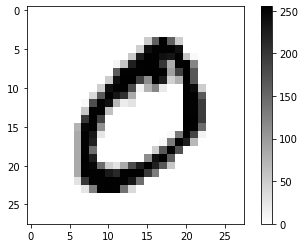

In [28]:
plt.figure()
plt.imshow(train_images[1],cmap = 'binary')
plt.colorbar()
plt.grid(False)
plt.show()

# PREPROCESSING
_Here we will carry out normalization i.e converting the image pixels to values between 0 and 1_

In [29]:
train_images = train_images/ 255.0
test_images = test_images/ 255.0

In [33]:
#ADDING A CONVOLUTIONAL LAYER OR EVEN 2
model = keras.Sequential([
   # conv layer 1
    keras.layers.Conv2D(16,(3,3), input_shape=(28,28,1), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    # conv layer 2 
    keras.layers.Conv2D(16,(3,3), activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    # normal layers
    keras.layers.Flatten(), # input layer
    keras.layers.Dense(128,activation='relu'), # hidden layer
    keras.layers.Dense(10,activation='softmax'), # output layer
])


In [34]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1785 - accuracy: 0.9450
Epoch 2/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0574 - accuracy: 0.9823
Epoch 3/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0421 - accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0329 - accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0259 - accuracy: 0.9915


In [36]:
print('MODEL EVALUATION ON TEST DATA')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)


MODEL EVALUATION ON TEST DATA
313/313 [==============================] - 2s 7ms/step - loss: 0.0338 - accuracy: 0.9904


lets have some fun trying to predict the first five test images

In [37]:
model.save('first_convnet_model_with_mnist_digit.h5')

In [ ]:
predictions = model.predict(test_images[:5])
print(predictions)

In [ ]:
print(np.argmax(predictions[0]))

In [ ]:
print(predictions[0])

In [ ]:
print(test_labels[0])

**SO THE MODEL KIND OF PREDICTS OUTPUT USING A PROBABILITY SCORE AND THE CLASS WITH THE CLOSEST SCORE TO 1 , GETS CHOSEN AS THE PREDICTED CLASS**

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

😁😁😀😀
DEEP LEARNING == FUN == True